#Programación con CUDA en Python

##Introducción
Las GPU (unidades de procesamiento de gráficos), como su nombre lo indica, se desarrollaron originalmente para procesar gráficos por computadora. Desde entonces, se han vuelto omnipresentes en casi todas las áreas que requieren un alto rendimiento computacional. Este progreso ha sido posible gracias al desarrollo de interfaces GPU de propósito general, que nos permiten programar GPU para aplicaciones de cualquier tipò. La más común de estas interfaces es CUDA , seguida de OpenCL y, más recientemente, HIP .

##CUDA en Python
CUDA se diseñó originalmente para ser compatible con el lenguaje C. Las versiones posteriores lo ampliaron a C++ y Fortran. En el ecosistema de Python, una de las formas de usar CUDA es a través de **Numba, un compilador Just-In-Time (JIT) para Python que puede utilizarse con una GPU**. Con Numba, uno puede escribir núcleos (kernels o funciones a ejecutarse en la GPU) directamente, y Numba compilará el código sobre la marcha y lo ejecutará. Si bien no implementa la API de CUDA completa, es mas que suficiente para obtener aceleraciones de ejecución de código mut buenas en comparación con las CPU ( se recomienra consultar  la documentación de Numba ).
https://numba.readthedocs.io/en/stable/cuda/overview.html#missing-cuda-features

##Numba como acelerador de Código en la CPU

Numba tiene tres características principales que muestran sus ventajas pero también evidencian algunos contras al momento de procesar funciones no numéricas.

###Compilador de funciones: 
Numba solo optimiza funciones matemáticas, no optimiza código entero. Si agregaras un script completo, solo optimizaría las funciones matemáticas. Es importante que conozcas si hay funciones propias de Python que pueden resolver tus problemas ya que en algunas ocasiones estas son más rápidas que incluso si se pasan a código máquina.
###Just-in-time: 
Numba, de manera inmediata transforma el código de Python a un código intermedio y luego a código máquina. Lo cual sirve para ir evaluando el desempeño a medida que vas escribiendo tu código y determinar cuándo es bueno usar Numba y cuándo no.
###Funciones numéricas: 
Numba solo procesa funciones numéricas como int, float o complex. Si Numba encuentra funciones no numéricas, dejará que se procesen normalmente como código en Python.

##Uilizando el decorador @numba.jit
Para utilizar Numba en Python sòlolo hsy que agregar una funcionalidad familiar de Python, un decorador (un envoltorio) en la  función que queremos que se compile con Numba 

In [ ]:
from numba import jit
@jit
def function(x):
    # your loop or numerically intensive computations
    return x

Numba optimiza el código mediante la infraestructura Low Level Virtual Machine **LLVM: A Compilation Framework for Lifelong Program Analysis & Transformation**. Una colección de tecnologías de cadenas de herramientas y compiladores modulares y reutilizables.

<center>
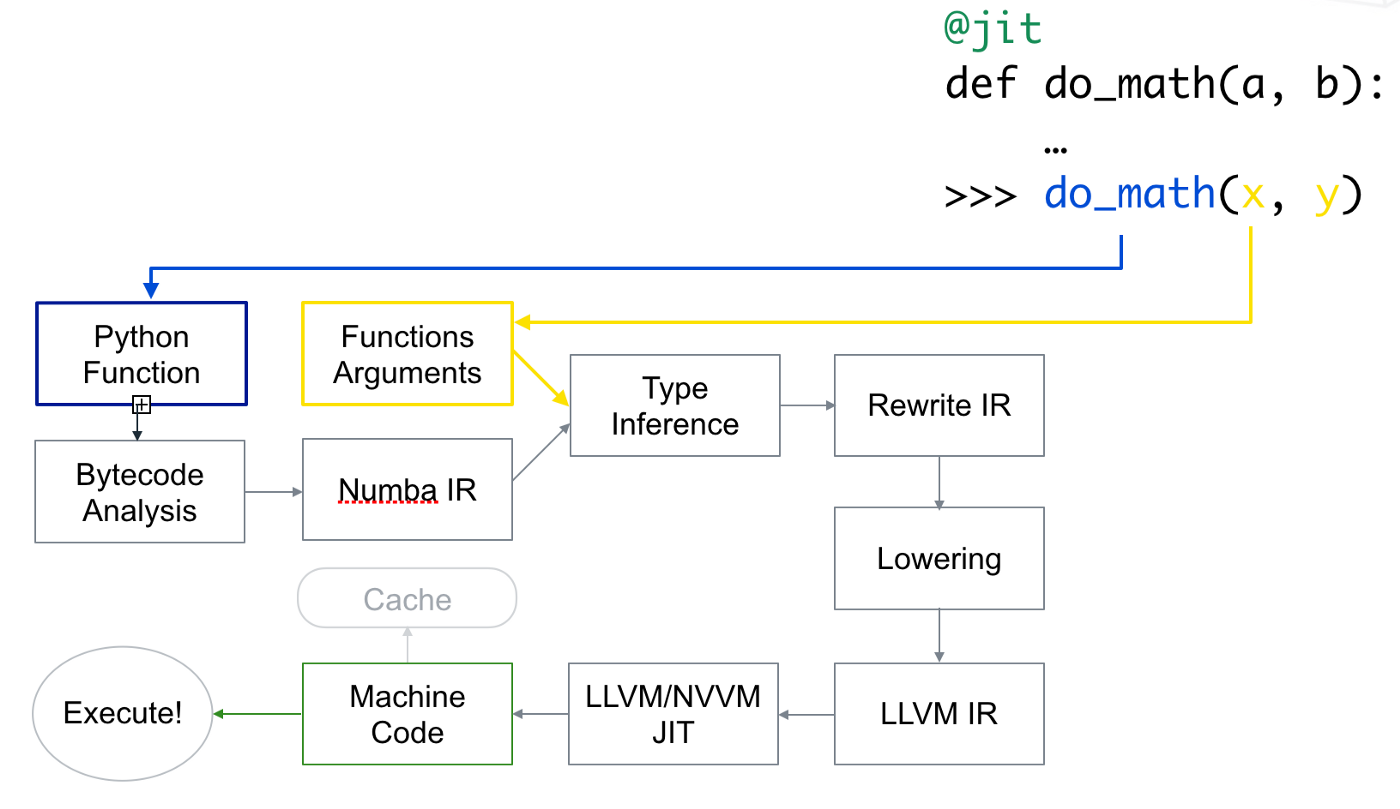

### Algunos Ejemplos de aceleraxión de código con Numba y CPU

###Cálculo de la hypotenusa
####1.- Python puro

In [1]:
## Python Puro
def hypot_py(x, y):
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

####2.- Python con Numba

In [2]:
from numba import jit
import math

@jit
def hypot_num(x, y):
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

In [3]:
%timeit hypot_py(3.0, 4.0)

616 ns ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%timeit hypot_num(3.0, 4.0)

209 ns ± 5.92 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
%timeit math.hypot(3.0, 4.0)

126 ns ± 22.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#Un ejemplo gráfico, Fractal Mandelbrot

In [5]:
from timeit import default_timer as timer
from matplotlib.pylab import imshow, show
import numpy as np

####1.- Python puro

Execution time: 106.591721 seconds


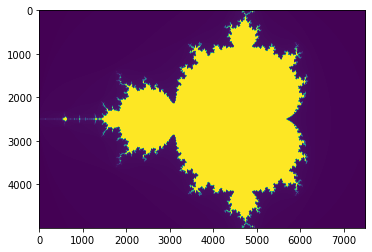

In [8]:
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255



def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 10, 750 * 10), dtype=np.uint8)

s = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
print("Execution time: %f seconds" % (e - s))

imshow(image)
show()

####2.- Python con Numba

Execution time: 1.563707 seconds


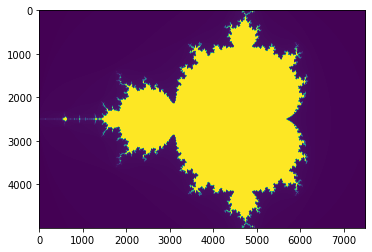

In [6]:
from numba import jit


@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255


@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 10, 750 * 10), dtype=np.uint8)

s = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
print("Execution time: %f seconds" % (e - s))

imshow(image)
show()

#Introducción a la programación paralela para GPU
La mayor ventaja que tienen las GPU sobre las CPU es su capacidad para ejecutar las mismas instrucciones en paralelo. Un solo núcleo de CPU ejecuta las instrucciones en serie, una tras otra. Paralelizar el código  requiere el uso de  múltiples núcleos (físicos o virtuales ) al mismo tiempo. Un ordenador  moderno estándar tiene de 4 a 8 núcleos. Por otro lado, las GPU  tienen cientos, si no miles, de núcleos. Los núcleos de GPU son generalmente más lentos y solo pueden ejecutar instrucciones simples, pero su gran número generalmente compensa esas deficiencias. La advertencia es que para que las GPU tengan una ventaja sobre las CPU, los algoritmos que ejecutan deben ser paralelizables.

##Aspectos principales para  la programación de GPU. 
###Primero: 
Entender cómo pensar y diseñar algoritmos que sean paralelos por naturaleza. Esto puede ser difícil porque algunos algoritmos están diseñados en serie, pero también porque pueden haber muchas formas de paralelizar el mismo algoritmo. (Recordad el Módulo 3 parte 2)

###Segundo:
Debemos aprender a mapear estructuras que se encuentran en el host,como vectores e imágenes, en construcciones propias de GPU, como hilos y bloques. 

###Tercero: 
Comprender el modelo de ejecución asincrónica que implica la programación de una GPU. No solo las GPU y las CPU ejecutan instrucciones de forma independiente, las GPU tienen flujos que permiten que se ejecuten múltiples flujos de procesamiento en la misma GPU. Esta asincronía es importante cuando se diseñan flujos de procesamiento óptimos.



##Arquitectura GPU

<center>
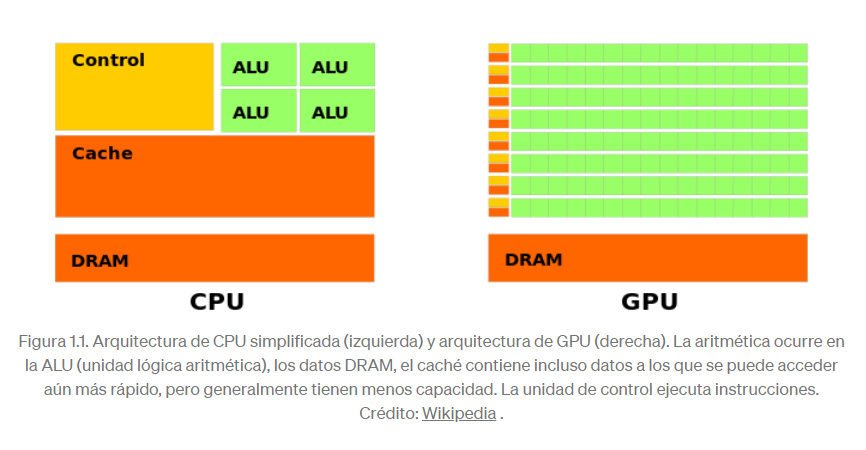
</center>


<center>
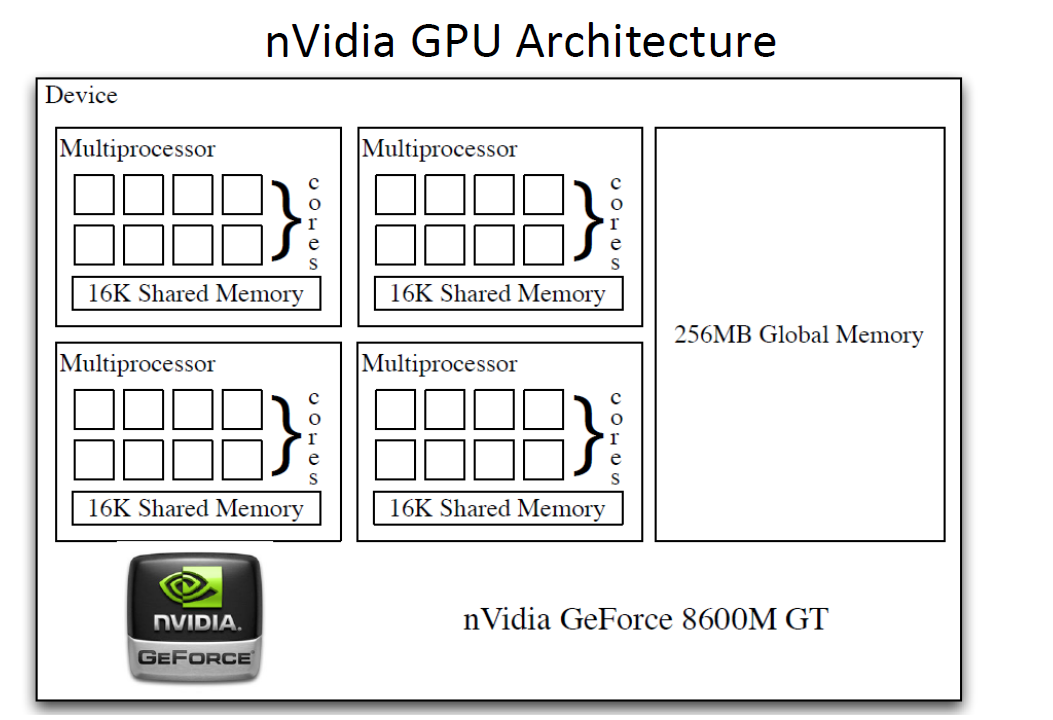

##Detectando si tenemos el entorno CUDA
###1.-  Entrar en el entorn COLAB de Google
 (https://colab.research.google.com/).

Podéis hacerlo en local si teneis una tarjeta NVDIA y os instaláis la librería numba y cuda
###2.- Escoger un entorno de ejecución alojado con GPU. Se puede cambiar la configuración del entorno en Entorno de Ejecición --> Cambiar tipo de entorno de ejecución y escoger GPU. Colab no suele ser muy generoso al utilizar GPU en su versión gratuita.
###3.- Importar las librerías necesarias y ejecutar la celda correspondiente 

In [7]:
import numba
from numba import cuda

print(np.__version__)
print(numba.__version__)
cuda.detect()

1.21.6
0.56.3
Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-825a598f-1741-9ac2-3ed9-b6a6da6a40ca
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported


True

##Ver las características de la GPU

In [13]:
!pip install --upgrade cuda-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.4 MB 15.4 MB/s 


In [14]:
from cuda.cuda import CUdevice_attribute, cuDeviceGetAttribute, cuDeviceGetName, cuInit

In [15]:
# Initialize CUDA Driver API
(err,) = cuInit(0)

In [16]:
# Get attributes
err, DEVICE_NAME = cuDeviceGetName(128, 0)
DEVICE_NAME = DEVICE_NAME.decode("ascii").replace("\x00", "")

err, MAX_THREADS_PER_BLOCK = cuDeviceGetAttribute(
    CUdevice_attribute.CU_DEVICE_ATTRIBUTE_MAX_THREADS_PER_BLOCK, 0
)
err, MAX_BLOCK_DIM_X = cuDeviceGetAttribute(
    CUdevice_attribute.CU_DEVICE_ATTRIBUTE_MAX_BLOCK_DIM_X, 0
)
err, MAX_GRID_DIM_X = cuDeviceGetAttribute(
    CUdevice_attribute.CU_DEVICE_ATTRIBUTE_MAX_GRID_DIM_X, 0
)
err, SMs = cuDeviceGetAttribute(
    CUdevice_attribute.CU_DEVICE_ATTRIBUTE_MULTIPROCESSOR_COUNT, 0
)

In [17]:
print(f"Device Name: {DEVICE_NAME}")
print(f"Maximum number of multiprocessors: {SMs}")
print(f"Maximum number of threads per block: {MAX_THREADS_PER_BLOCK:10}")
print(f"Maximum number of blocks per grid:   {MAX_BLOCK_DIM_X:10}")
print(f"Maximum number of threads per grid:  {MAX_GRID_DIM_X:10}")

Device Name: Tesla T4                                                                
Maximum number of multiprocessors: 40
Maximum number of threads per block:       1024
Maximum number of blocks per grid:         1024
Maximum number of threads per grid:  2147483647


#Núcleos (Kernels) en  una GPU
los núcleos son funciones de GPU que inician subprocesos.
No pueden devolver valores lo que se  soluciona eso pasando entradas y salidas desde la CPU a la GPPU y viceversa.
###Utilizaremos un "decorador"
##@cuda.jit
Se utiliza siempre para definir kernels y también funciones simples  que se ejecutarán en la GPU..

##Paralelización con CUDA
###La anatomía de una malla en CUDA
Cuando se inicia un núcleo, tiene una malla de procesamiento asociada. Una malla o **cuadrícula** se compone de **bloques** ; un bloque se compone de **hilos**. La figura siguiente muestra una cuadrícula CUDA unidimensional. La cuadrícula de la figura tiene 4 bloques. El número de bloques en una cuadrícula se mantiene en una variable especial a la que se puede acceder dentro del núcleo llamada **gridDim.x**. El .x se refiere a la primera dimensión de la cuadrícula (la única en este caso). Las mallas bidimensionales también tienen .una dimensión .y las  tridimensionales, .z . Dentro del núcleo, podemos averiguar qué bloque se está ejecutando mediante el uso de **blockIdx.x**. en este caso podría ser de  0 a 3.

Cada bloque tiene un cierto número de subprocesos, contenidos en la variable **blockDim.x**. Los índices de subprocesos se mantienen en la variable **threadIdx.x**, que en el caso de la figura serían de 0 a 7.

Es importante destacar que los subprocesos en diferentes bloques están programados para ejecutarse de manera diferente, tienen acceso a diferentes regiones de memoria y difieren también en otras formas (consulte Actualización de CUDA: el modelo de programación de CUDA. 
https://developer.nvidia.com/blog/cuda-refresher-cuda-programming-model/

Los bloques se organizan en una cuadrícula **unidimensional, bidimensional o tridimensional** de bloques de hilos. La cantidad de bloques de subprocesos en una cuadrícula generalmente depende del tamaño de los datos que se procesan, que generalmente excede la cantidad de procesadores en el sistema.


<center>
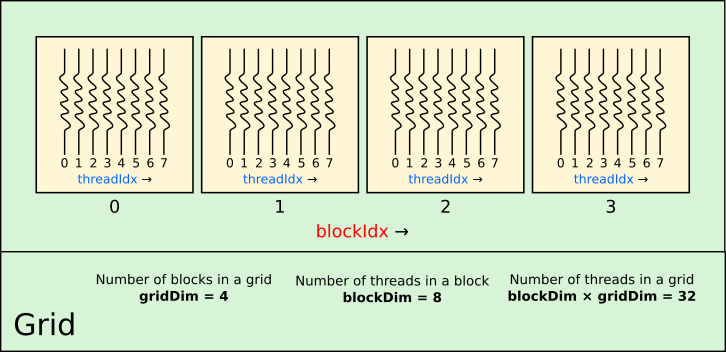
<p>Malla cuda de una dimensión</p>
</center>

##Un kernel simple
Supongamos que queremos sumar dos vectores cada uno de 20 elementos. Como en la figura anterior, podróiamos lanzar un kernel con 8 subprocesos por bloque. Si queremos que cada subproceso trabaje solo un elemento del vector, probemos con 4 bloques y con 8 hilos cada uno, nuestra malla lanzará 32 hilos.

Ahora veamos cómo se mapean  los índices de subprocesos a los índices del vector. **threadIdx.x** se ejecuta de 0 a 7, por lo que por sí solos no pueden indexar nuestro vector. Además, diferentes bloques tienen el mismo **threadIdx.x**. Por otro lado, tienen diferentes **blockIdx.x**. Para obtener un índice único para cada hilo, podemos combinar estas variables:

***i = threadIdx.x + blockDim.x * blockIdx.x***

Para el primer bloque, **blockIdx.x** = 0 e i valdrá de 0 a 7. Para el segundo bloque, **blockIdx.x = 1**. Como **blockDim.x = 8**, i valdrá de 8 a 15. De igual forma, para **blockIdx.x = 2**, i valdrá de 16 a 23. En el cuarto y último bloque, i co de 24 a 31. Ver Tabla 1 a continuación.
Veamos la Tabla siguiente que relaciona hilos y el índice i.

| `i`           | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15   | 16   | ...   | 31   |
| ----------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| `threadIdx.x` | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 0    | ...    | 7    |
| `blockIdx.x`  | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 1    | 1    | 1    | 1    | 1    | 1    | 1    | 1    | 2    | ...    | 3    |

<center><p>Indexación lineal con hilos y bloques.</p></center>



En este ejemplo vemos cómo asignar cada subproceso a cada elemento del vector pero algunos subprocesos desbordarían el vector, ya que la matriz tiene 20 elementos y i llega a a 32-1. Con estos hilos ¡no hacemos nada nada!. Esto es un ejemplo, en realidad  podemos hacerlo con 3 bloques con 8 elementos.

Veamos el código.

In [8]:
@cuda.jit
def add_array(a, b, c):
    i = cuda.threadIdx.x + cuda.blockDim.x * cuda.blockIdx.x
    if i < a.size:
        c[i] = a[i] + b[i]

In [9]:
N = 20
a = np.arange(N, dtype=np.float32)
b = np.arange(N, dtype=np.float32)
dev_c = cuda.device_array_like(a)

add_array[3, 8](a, b, dev_c)

c = dev_c.copy_to_host()
print(c)

/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 3 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38.]


/usr/local/lib/python3.7/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


**Comentario:** En las versiones más recientes de Numba, recibimos una advertencia que indica que llamamos al kernel con arrays de host. Idealmente, queremos evitar mover datos del host al dispositivo, ya que esto es muy lento. Deberíamos estar llamando al núcleo con arreglos de dispositivos en todos los argumentos. Podemos hacerlo moviendo la matriz del host al dispositivo de antemano:

In [10]:
dev_a = cuda.to_device(a)
dev_b = cuda.to_device(b)

Además, el cálculo de índices únicos por subproceso puede ser inmanejable rápidamente. Afortunadamente, Numba proporciona  un envoltorio simple **cuda.grid** que se llama con la dimensión de la cuadrícula como único argumento. El nuevo núcleo se verá así:

In [11]:
@cuda.jit
def add_array(a, b, c):
    i = cuda.grid(1)
    if i < a.size:
        c[i] = a[i] + b[i]

Y lo ejecutamos con:

In [12]:
add_array[4, 8](dev_a, dev_b, dev_c)

c = dev_c.copy_to_host()
print(c)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38.]


/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


##**Cuántos Bloques y cúantos hilos ??**

¿Qué sucede cuando cambiamos el tamaño de la matriz? Una salida fácil es simplemente cambiar los parámetros de la cuadrícula (número de bloques y subprocesos por bloque) ***para iniciar al menos tantos subprocesos como elementos hay en la matriz***.

**Hay ciertas recomendaciones**.

**(a)** Deben ser un múltiplo de dos, generalmente entre 32 y 1024, y 

**(b)** Deben elegirse para maximizar la ocupación (cuántos subprocesos están activos al mismo tiempo). ). Nvidia proporciona una hoja de cálculo que puede ayudar a calcularlos. 
https://docs.nvidia.com/cuda/cuda-occupancy-calculator/index.html

De todas formas, nada puede predecir el comportamiento de sus núcleos, por lo que si realmente se desea optimizar estos parámetros, se debe probar el código con diferentes datos. 
***En la práctica, un número "razonable" de subprocesos para las GPU modernas es 256.***

In [13]:
N = 1_000_000
a = np.arange(N, dtype=np.float32)
b = np.arange(N, dtype=np.float32)

dev_a = cuda.to_device(a)
dev_b = cuda.to_device(b)
dev_c = cuda.device_array_like(a)

threads_per_block = 256
blocks_per_grid = (N + (threads_per_block - 1)) // threads_per_block
# Note that
#     blocks_per_grid == ceil(N / threads_per_block)
# ensures that blocks_per_grid * threads_per_block >= N

add_array[blocks_per_grid, threads_per_block](dev_a, dev_b, dev_c)

c = dev_c.copy_to_host()
np.allclose(a + b, c)

True

**Comentario** Las GPU no pueden ejecutar un número arbitrario de subprocesos y bloques. Por lo general, cada bloque no puede tener más de 1024 subprocesos y una cuadrícula no puede tener más de 2¹⁶ − 1 = 65535 bloques. Esto no quiere decir que pueda iniciar subprocesos de 1024 × 65535... hay límites en la cantidad de subprocesos que se pueden iniciar en función de la cantidad de memoria que ocupan sus registros, entre otras consideraciones. Además, se debe tener cuidado al tratar de procesar matrices grandes que no caben en la RAM de la GPU de una sola vez. En estos casos, uno puede beneficiarse del procesamiento de las matrices por partes, ya sea utilizando una sola GPU o varias GPU.

In [14]:
from numba import cuda

@cuda.jit
def gpu_sqrt_kernel(x, out):
  idx = cuda.grid(1)
  out[idx] = math.sqrt(x[idx])

In [15]:
import numpy as np
a = np.arange(4096,dtype=np.float32)
a

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.093e+03, 4.094e+03,
       4.095e+03], dtype=float32)

In [16]:
# move input data to the device
d_a = cuda.to_device(a)
# create output data on the device
d_out = cuda.device_array_like(d_a)


In [18]:
import math
# we decide to use 32 blocks, each containing 128 threads
blocks_per_grid = 32
threads_per_block = 128
gpu_sqrt_kernel[blocks_per_grid, threads_per_block](d_a, d_out)
# wait for all threads to complete
cuda.synchronize()
# copy the output array back to the host system
# and print it
print(d_out.copy_to_host())

[ 0.         1.         1.4142135 ... 63.97656   63.98437   63.992188 ]


##Bucles de rejilla
En los casos en que la cantidad de bloques por cuadrícula excede el límite de hardware pero la matriz cabe en la memoria, en lugar de usar un subproceso por elemento de la matriz, podemos usar un **subproceso para procesar varios elementos (redordad la granularidad gruesa?**. Lo haremos mediante el uso de una técnica llamada **loops grid-stride** . Además de superar las limitaciones de hardware, los núcleos de bucle grid-stride se benefician de la reutilización de subprocesos, al minimizar la sobrecarga de creación/destrucción de subprocesos. 
La idea detrás de esta técnica es agregar un bucle dentro del núcleo CUDA para procesar múltiples elementos de entrada. El **paso** de este bucle, como su nombre lo indica, es igual al número de hilos en una cuadrícula. De esta manera, si el número total de subprocesos en la cuadrícula ** ( threads_per_grid = blockDim.x * gridDim.x)** es menor que el número de elementos de la matriz, tan pronto como el kernel termine de procesar el índice cuda.grid(1), procesará el índice **cuda.grid(1) + threads_per_grid** y así sucesivamente hasta que se hayan procesado todos los elementos de la matriz . . 


In [19]:
@cuda.jit
def add_array_gs(a, b, c):
    i_start = cuda.grid(1)
    threads_per_grid = cuda.blockDim.x * cuda.gridDim.x
    for i in range(i_start, a.size, threads_per_grid):
        c[i] = a[i] + b[i]

In [21]:
N = 1_000_000
a = np.arange(N, dtype=np.float32)
b = np.arange(N, dtype=np.float32)

dev_a = cuda.to_device(a)
dev_b = cuda.to_device(b)
dev_c = cuda.device_array_like(a)

In [22]:
threads_per_block = 256
blocks_per_grid_gs = 32 * 80  # Use 32 * multiple of streaming multiprocessors
# 32 * 80 * 256 < 1_000_000 so one thread will process more than one array element

add_array_gs[blocks_per_grid_gs, threads_per_block](dev_a, dev_b, dev_c)
c = dev_c.copy_to_host()
np.allclose(a + b, c)

True

## Mandelbrot con CUDA

/usr/local/lib/python3.7/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Execution time: 0.508317 seconds


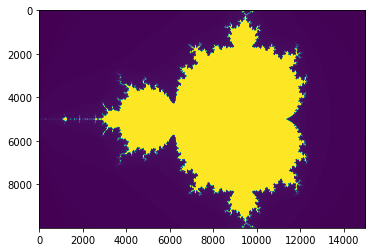

In [24]:
from numba import cuda


@cuda.jit(device=True)
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255


@cuda.jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height

    x, y = cuda.grid(2)

    if x < width and y < height:
        real = min_x + x * pixel_size_x
        imag = min_y + y * pixel_size_y
        color = mandel(real, imag, iters)
        image[y, x] = color


width = 15000
height = 10000
image = np.zeros((height, width), dtype=np.uint8)

pixels = width * height
nthreads = 32
nblocksy = (height // nthreads) + 1
nblocksx = (width // nthreads) + 1
s = timer()

create_fractal[(nblocksx, nblocksy), (nthreads, nthreads)](
    -2.0, 1.0, -1.0, 1.0, image, 20
)

e = timer()
print("Execution time: %f seconds" % (e - s))

imshow(image)
show()

##Referencias
https://github.com/cako/cuda-by-numba-examples/blob/main/CUDA_by_Numba_Examples_1_of_4.ipynb

In [25]:
size = 400
iterations = 100
m = np.zeros((size, size))

In [27]:
@cuda.jit
def mandelbrot_numba(m, iterations):
    # Matrix index.
    i, j = cuda.grid(2)
    size = m.shape[0]
    # Skip threads outside the matrix.
    if i >= size or j >= size:
        return
    # Run the simulation.
    c = (-2 + 3. / size * j +
         1j * (1.5 - 3. / size * i))
    z = 0
    for n in range(iterations):
        if abs(z) <= 10:
            z = z * z + c
            m[i, j] = n
        else:
            break

In [28]:
# 16x16 threads per block.
bs = 16
# Number of blocks in the grid.
bpg = math.ceil(size / bs)
# We prepare the GPU function.
f = mandelbrot_numba[(bpg, bpg), (bs, bs)]

In [29]:
f(m, iterations)

/usr/local/lib/python3.7/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

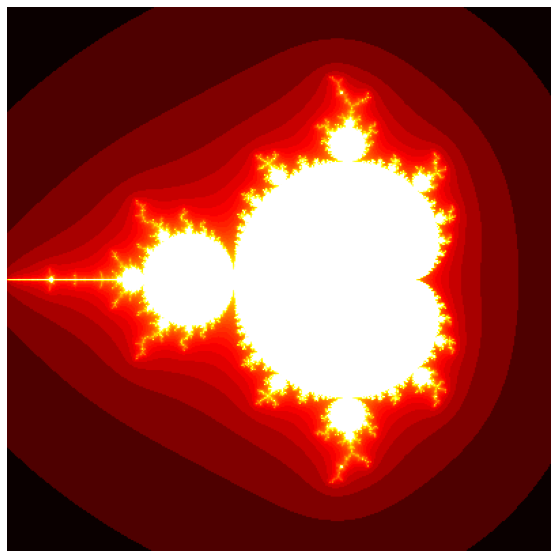

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()